# Generate IR with Delay (Echo) Effect

In [43]:
import scipy.io.wavfile
import numpy as np

# parameters

fs = 44100
duration = 1.0
delays = [
    {
        "time": 0.,
        "level": 0.,
        "channel": 0,
    },
    {
        "time": 0.,
        "level": -12.,
        "channel": 1,
    },
    {
        "time": .2,
        "level": -18.,
        "channel": 0,
    },
    {
        "time": .2,
        "level": -6.,
        "channel": 1,
    }
]

In [44]:
def generate_unit_ir(filename, fs, duration):
    shape = (int(fs*duration), 2)
    ir = np.zeros(shape, dtype=np.float32)
    ir[0, 0] = 1.
    ir[0, 1] = 1.
    scipy.io.wavfile.write(filename, fs, ir)

def generate_delay_ir(filename, fs, duration, delays):
    shape = (int(fs*duration), 2)
    ir = np.zeros(shape, dtype=np.float32)

    for delay in delays:
        # to level
        n = int(fs * delay["time"])
        level = np.power(10, delay["level"]/20)
        channel = delay["channel"]
        # write
        ir[n, channel] = level

    # write to wav
    scipy.io.wavfile.write(filename, fs, ir)
    
generate_unit_ir("IR_unit.wav", fs, duration)
generate_delay_ir("IR_delay_effect.wav", fs, duration, delays)

# Plot

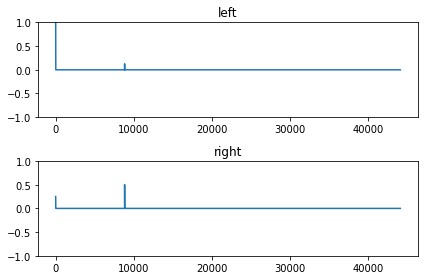

In [45]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_ylim(-1,1)
ax1.set_title('left')
ax1.plot(ir[:,0])
ax2.set_title('right')
ax2.set_ylim(-1,1)
ax2.plot(ir[:,1])
fig.tight_layout()

fig.savefig('plot.png')